In [63]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
snpData = pd.read_csv('/Users/methun/self/Research/Dataset/Dummy/snps_small_tst.csv', index_col = 0)
snpData

,pos1,pos2,pos3,pos4,pos5,pos6
Genotype,,,,,,
G1,0,1,2,1,1,1
G2,0,1,2,0,1,0
G3,0,1,2,0,1,0
G4,0,1,2,1,1,1
G5,0,2,2,2,0,2
G6,0,2,2,1,1,1
G7,0,2,2,1,1,1
G8,0,2,2,2,1,2
G9,0,0,2,0,1,1


In [65]:
x_std = StandardScaler().fit_transform(snpData)
pca = PCA(n_components = n)
pca.fit(x_std)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
dat=[]
k=1
for i in pca.components_:
    l = [j for j in i]
    l.insert(0, k)
    k = k + 1
    dat.append(pd.Series(l, index=td.columns))

td = pd.DataFrame(dat, columns=snpData.columns.insert(0, "SNPs"))

    #td.append(dat,ignore_index=True)
td


,SNPs,pos1,pos2,pos3,pos4,pos5,pos6
0,1.0,-0.057736,0.369483,0.338687,0.529558,-0.401082,0.551491
1,2.0,0.706332,-0.490232,0.274201,0.246837,0.286968,0.205675
2,3.0,0.270834,-0.216618,-0.757234,0.124203,-0.520709,0.140563
3,4.0,0.602840,0.459981,0.225585,-0.398893,-0.374722,-0.273094
4,5.0,0.239324,0.591502,-0.429492,0.087630,0.587512,0.235664
5,6.0,0.060971,0.121554,-0.036750,0.690231,0.007646,-0.709704


In [67]:
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]
print(xvector)
print(yvector)
xs = pca.transform(x_std)[:,0]
ys = pca.transform(x_std)[:,1]
print(xs)
print(ys)

[-0.05773639  0.36948258  0.33868668  0.52955814 -0.40108164  0.55149086]
[ 0.70633233 -0.49023208  0.27420051  0.24683705  0.28696752  0.20567534]
[ 0.15631834 -1.25141333 -1.25141333  0.15631834  3.66660409  0.6019311
  0.6019311   2.00966276 -0.95913837 -0.28929443 -0.52781399 -0.35733819
 -3.09620247  1.11843724  1.11843724 -1.69702609]
[-0.16809235 -0.75551025 -0.75551025 -0.16809235 -1.35743173 -0.75933448
 -0.75933448 -0.17191659  0.11092285  0.42314977  3.34113733  0.46018572
 -1.2970404   1.01056767  1.01056767 -0.16426812]


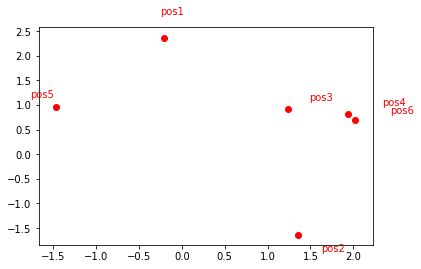

In [71]:
for i in range(len(xvector)):
    plt.scatter(xvector[i]*max(xs), yvector[i]*max(ys),
              color='r')
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(snpData.columns.values)[i], color='r')
plt.show()

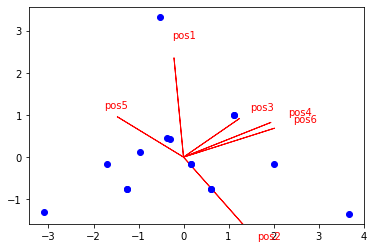

In [69]:
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(snpData.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
#    plt.text(xs[i]*1.2, ys[i]*1.2, list(snpData.index)[i], color='b')

plt.show()